#  01. Notebook Setup

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create quick path to project folder

projpath = r'/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A4 - Python Fundamentals for Data Analysts/Submitted Tasks/2024-01 Instacart Basket Analysis'

# 02. File Import and DF Creation + Checks

In [3]:
# Import orders_products_all.pkl data file

orders_products_all = pd.read_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check dimensions of new df - should have (32404859, 34) for shape

orders_products_all.shape

(32404859, 34)

**Confirmed** Import pulled in correctly (rows/columns)

In [5]:
# Check output - view current column headers

orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customers_first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,_merge
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 03. Visualizations

## Histogram for Senior Stakeholders 
#### Part 2 - Step 3

[Text(0.5, 0, 'Hour of Day - Midnight to Midnight'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Orders by Time of Day')]

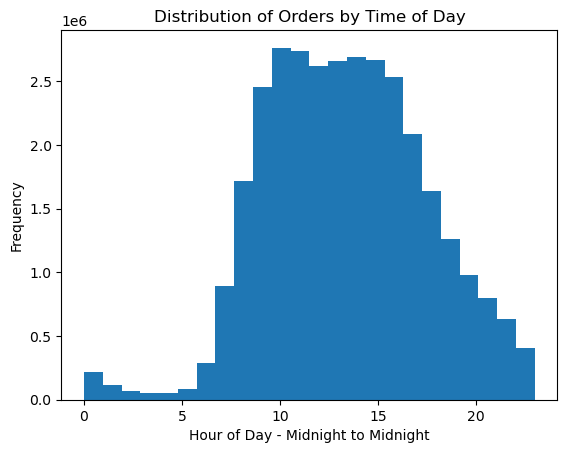

In [6]:
# Create a histogram for the 'order_hour_of_day' column - 24 bins, one for each hour of the day

hist_hour = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)

# Add labels and a title

hist_hour.set(xlabel='Hour of Day - Midnight to Midnight', ylabel='Frequency', title='Distribution of Orders by Time of Day')

**Observations on Histogram**

This chart indicates that the majorityof orders are placed during business hours with some still coming in during the evening. Orders overnight and early morning are infrequent.

#### Part 2 - Step 8

In [7]:
# Export the histogram to my files

hist_hour.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'hist_hour.png'), bbox_inches = 'tight')

## Bar Chart for Marketing
#### Part 2 - Step 4

[Text(0.5, 0, 'Customer Loyalty Type'),
 Text(0, 0.5, 'Number of Customers'),
 Text(0.5, 1.0, 'Customer Distribution by Loyalty Type')]

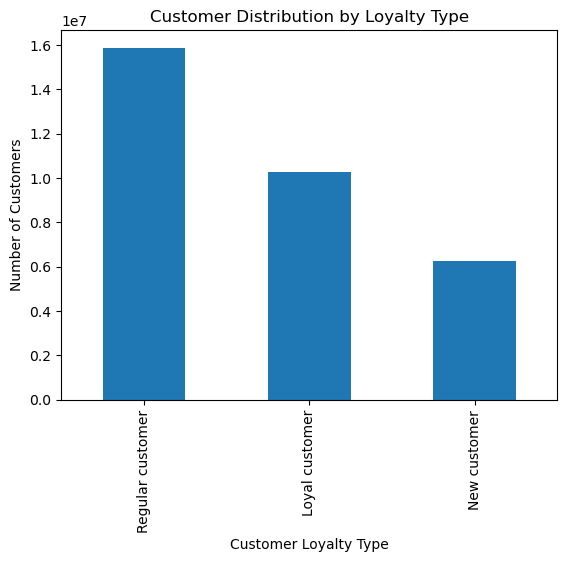

In [8]:
# Create a bar chart for "Loyalty Flag" with a sort by size

bar_loyalty = orders_products_all['loyalty_flag'].value_counts().plot.bar()

# Add labels and a title 

bar_loyalty.set(xlabel='Customer Loyalty Type', ylabel='Number of Customers', title='Customer Distribution by Loyalty Type')

**Observations on Bar Chart**

The majority of customers are regular customers, followed by the loyal customer base. 

*Thought for final report:* There may be an opportunity to move the new customers (and regular customers) to loyal customers category.

#### Part 2 - Step 8

In [9]:
# Export the bar chart to my files

bar_loyalty.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

## Line Chart of Price and Hour of Day

#### Part 2 - Step 5

In [10]:
# Create a sample with a 4-seed and create a list of true-false values to assign to dataframe rows

np.random.seed(4)
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [11]:
# Split the code into two new dataframes where 70% of data goes in big

big = orders_products_all[dev]

In [12]:
# Split the code into two new dataframes where 30% of data goes in small

small = orders_products_all[~dev]

In [13]:
# Check the length of the original dataframe

len(orders_products_all)

32404859

In [14]:
# Check the length of the big + small dataframe (should be same as above)

len(big) + len(small)

32404859

**Confirmed** DF has been split into two correctly.

In [15]:
# Create a df with only the columns needed for the chart, pulling from the small sample df

df_priceHour = small[['order_hour_of_day','prices']]

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Hour of Day - Midnight to Midnight'),
 Text(0, 0.5, 'Product Price for Order'),
 Text(0.5, 1.0, 'Product Price by Hour of Day')]

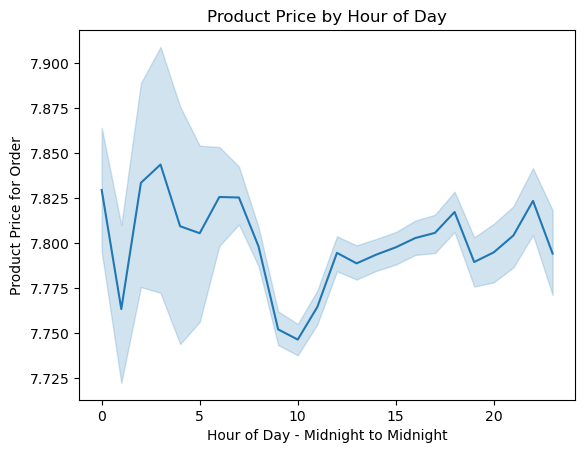

In [16]:
# Create a line chart with 'price' and 'days of the week for orders'

line_price_hour = sns.lineplot(data = df_priceHour, x = 'order_hour_of_day', y = 'prices')

# Add labels and a title 

line_price_hour.set(xlabel='Hour of Day - Midnight to Midnight', ylabel='Product Price for Order', title='Product Price by Hour of Day')

**Observations on Line Chart**

Based on the line chart, it appears that higher price items tend to be purchased earlier in the day and afternoon / end of the day. Lesser expensive items tend to be purchased late morning. 

#### Part 2 - Step 8

In [17]:
# Export the line chart to my files

line_price_hour.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'line_price_hour.png'), bbox_inches = 'tight')

## Line Chart of Age and Number of Dependants

#### Part 2 - Step 6

In [18]:
# Create a df with only the columns needed for the chart, pulling from the small sample df

df_AgeDeps = small[['Age','Number_of_Dependants']]

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Customer Age'),
 Text(0, 0.5, 'Number of Dependants'),
 Text(0.5, 1.0, 'Orders by Customer Age and Number of Dependants')]

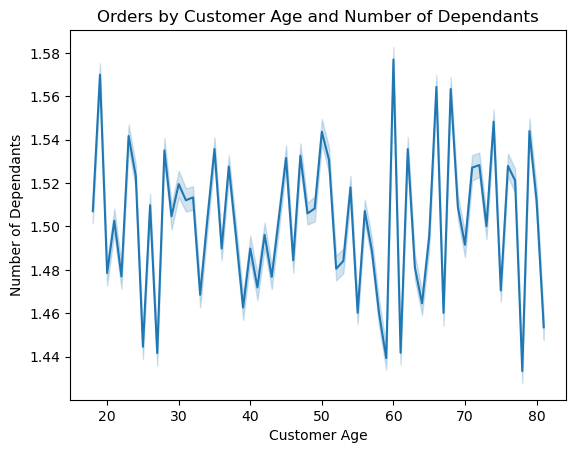

In [20]:
# Create a line chart with 'Age' and 'Age'

line_age_deps = sns.lineplot(data = df_AgeDeps, x = 'Age',y = 'Number_of_Dependants')

# Add labels and a title 

line_age_deps.set(xlabel='Customer Age', ylabel='Number of Dependants', title='Orders by Customer Age and Number of Dependants')

**Observations on Line Chart**

Based on this line chart, there doesn't seem to be any conclusions that can be drawn about the relationship between age and the number of dependants.

#### Part 2 - Step 8

In [21]:
# Export the line chart to my files

line_age_deps.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'line_age_dependants.png'), bbox_inches = 'tight')

## Scatterplot of Age and Income

#### Part 2 - Step 7

[Text(0.5, 0, 'Customer Age'),
 Text(0, 0.5, 'Income'),
 Text(0.5, 1.0, 'Income vs Age')]

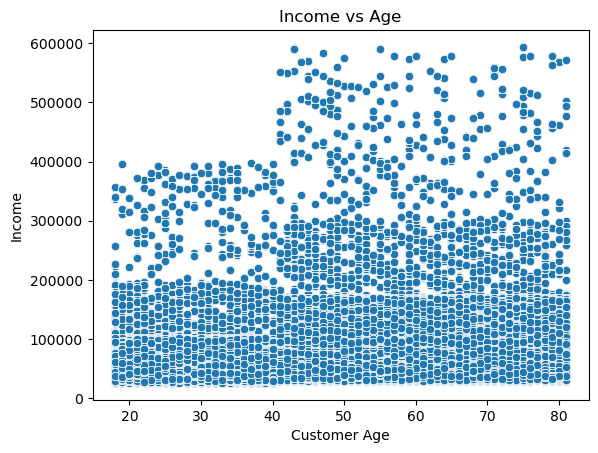

In [24]:
# Create a scatterplot to explore any connection between age and spending power

scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = orders_products_all)

# Add labels and a title 

scatter_age_income.set(xlabel='Customer Age', ylabel='Income', title='Income vs Age')

**Observations on Scatterplot**

Based on this scatterplot, while in many cases there is no correlation between age and income, there is a distinct pattern of some customers having a boost in income after around age 40.

#### Part 2 - Step 8

In [25]:
# Export the scatterplot to my files

scatter_age_income.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'scatter_age_income.png'), bbox_inches = 'tight')